In [6]:
%pip install matplotlib==3.3.4
%pip install networkx==2.6.2
import networkx as nx
import yaml
import matplotlib.pyplot as plt
import matplotlib

print(matplotlib.__version__)
print(nx.__version__)
# Set the backend to avoid the 'not iterable' error
#plt.switch_backend('TkAgg')


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
3.3.4
2.6.2


In [7]:
# Load the YAML file
with open('database_config.yaml') as f:
    data = yaml.safe_load(f)
# Create a new directed graph
G = nx.DiGraph()

In [8]:
# Add nodes to the graph
for node, attrs in data['graph']['nodes'].items():
    G.add_node(node, **attrs)



TypeError: add_node() argument after ** must be a mapping, not list

In [ ]:
# Add edges to the graph
for edge in data['graph']['edges']:
    G.add_edge(edge[0], edge[1])

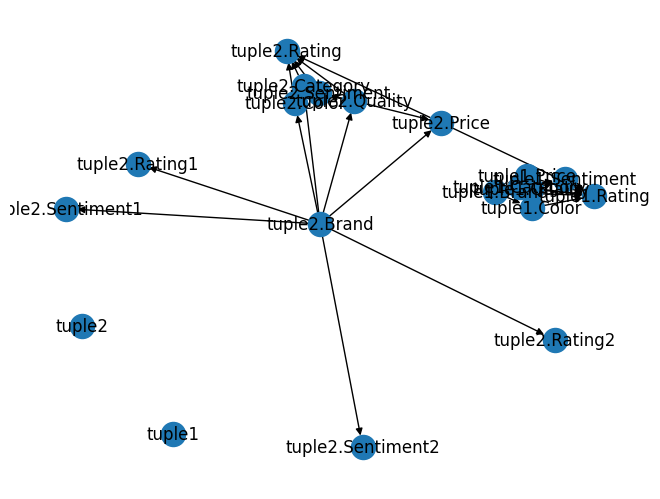

In [ ]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

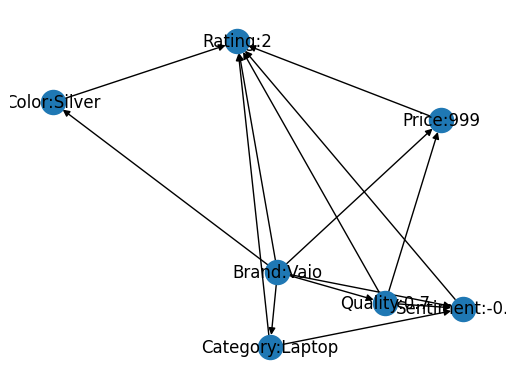

In [ ]:
# create the graph
G = nx.DiGraph()

# add the nodes
# G.add_nodes_from([('tuple1', {
#     'Category': 'Laptop',
#     'Price': 999,
#     'Brand': 'Vaio',
#     'Color': 'Silver',
#     'Quality': 0.7,
#     'Sentiment': -0.95,
#     'Rating': 2
# })])

# # add the edges
# G.add_edges_from([
#     ('tuple1.Brand', 'tuple1.Quality'),
#     ('tuple1.Brand', 'tuple1.Price'),
#     ('tuple1.Brand', 'tuple1.Color'),
#     ('tuple1.Brand', 'tuple1.Rating'),
#     ('tuple1.Brand', 'tuple1.Sentiment'),
#     ('tuple1.Brand', 'tuple1.Category'),
#     ('tuple1.Quality', 'tuple1.Price'),
#     ('tuple1.Quality', 'tuple1.Rating'),
#     ('tuple1.Quality', 'tuple1.Sentiment'),
#     ('tuple1.Category','tuple1.Sentiment'),
#     ('tuple1.Category', 'tuple1.Rating'),
#     ('tuple1.Price', 'tuple1.Rating'),
#     ('tuple1.Color', 'tuple1.Rating'),
#     ('tuple1.Sentiment', 'tuple1.Rating'),
#     ('tuple2.Price', 'tuple1.Rating')
# ])

G.add_node("Category:Laptop")
G.add_node("Price:999")
G.add_node("Brand:Vaio")
G.add_node("Color:Silver")
G.add_node("Quality:0.7")
G.add_node("Sentiment:-0.95")
G.add_node("Rating:2")

# Define the edges
G.add_edge("Brand:Vaio", "Quality:0.7")
G.add_edge("Brand:Vaio", "Price:999")
G.add_edge("Brand:Vaio", "Color:Silver")
G.add_edge("Brand:Vaio", "Rating:2")
G.add_edge("Brand:Vaio", "Sentiment:-0.95")
G.add_edge("Brand:Vaio", "Category:Laptop")
G.add_edge("Quality:0.7", "Price:999")
G.add_edge("Quality:0.7", "Rating:2")
G.add_edge("Quality:0.7", "Sentiment:-0.95")
G.add_edge("Category:Laptop", "Sentiment:-0.95")
G.add_edge("Category:Laptop", "Rating:2")
G.add_edge("Price:999", "Rating:2")
G.add_edge("Color:Silver", "Rating:2")
G.add_edge("Sentiment:-0.95", "Rating:2")

# G.remove_node('tuple1')
# G.remove_edges_from(list(G.edges('tuple1')))

# draw the graph
# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, nodelist=['tuple1'], node_color='r')
# nx.draw_networkx_edges(G, pos)
# nx.draw_networkx_labels(G, pos)

nx.draw(G, with_labels=True)
plt.show()
# show the graph
# plt.axis('off')
# plt.show()


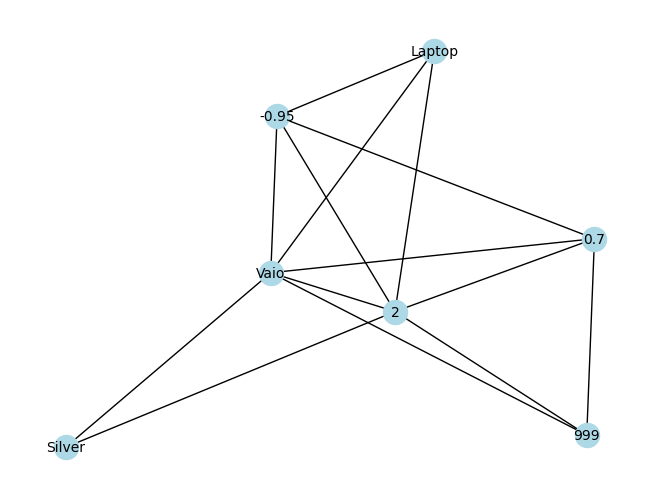

In [ ]:
G = nx.Graph()
G.add_nodes_from([("Category", {"label": "Laptop"}), 
                  ("Price", {"label": "999"}), 
                  ("Brand", {"label": "Vaio"}), 
                  ("Color", {"label": "Silver"}), 
                  ("Quality", {"label": "0.7"}), 
                  ("Sentiment", {"label": "-0.95"}), 
                  ("Rating", {"label": "2"})])

G.add_edges_from([("Brand", "Quality"), 
                  ("Brand", "Price"), 
                  ("Brand", "Color"), 
                  ("Brand", "Rating"), 
                  ("Brand", "Sentiment"), 
                  ("Brand", "Category"), 
                  ("Quality", "Price"), 
                  ("Quality", "Rating"), 
                  ("Quality", "Sentiment"), 
                  ("Category", "Sentiment"), 
                  ("Category", "Rating"), 
                  ("Price", "Rating"), 
                  ("Color", "Rating"), 
                  ("Sentiment", "Rating")])

pos = nx.spring_layout(G, k=1.5, seed=42)

node_labels = nx.get_node_attributes(G, "label")
nx.draw(G, pos=pos, with_labels=True, labels=node_labels, node_color='lightblue', edge_color='black', font_size=10)
plt.show()


In [ ]:
with open('database_config.yaml') as f:
    config = yaml.safe_load(f)

# Extract the list of nodes
nodes = config['graph']['nodes']
edges = config['graph']['edges']

import re
# Initialize dictionaries to store edges for each tuple
tuple_edges = {}
for node in nodes:
    tuple_num = int(node.split('[p')[1].split(']')[0])
    if tuple_num not in tuple_edges:
        tuple_edges[tuple_num] = []
    
for edge in edges:
    start_node, end_node = edge
    end_node_tuple = int(end_node.split('[p')[1].split(']')[0])
    
    if 'p1' in end_node:
        if end_node_tuple not in tuple_edges:
            tuple_edges[end_node_tuple] = []
        tuple_edges[end_node_tuple].append((start_node, end_node))

tuple1edges = tuple_edges.get(1, [])
tuple2edges = tuple_edges.get(2, [])
#Extract the edges based of key
#gets the amount of tuples extracted (only based off ingoing edges, so a tuple could be empty but have it's attributes sent to another node)
#len(tuple_edges.keys()) 
tuple1edges


IndexError: list index out of range

In [ ]:
import re
import copy
def get_key_from_value(nodes, value):
    for key, values in nodes.items():
        if value in values:
            return key
    return None

with open('database_config.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

# nodes = {}
# for node in data['graph']['nodes']:
#     node_id = int(re.findall(r'\d+', node)[0])
#     nodes[node_id] = {}
#     for item in data['graph']['nodes'][node]:
#         print(item)
#         nodes[node_id][node_id] = item
# print(nodes)
nodes = {}
for node in data['graph']['nodes']:
    node_id = int(re.findall(r'\d+', node)[0])
    nodes[node_id] = []
    for item in data['graph']['nodes'][node]:
        nodes[node_id].append(item)

print(nodes)
# nodes = {}
# for node in data['graph']['nodes']:
#     node_id = int(re.findall(r'\d+', node)[0])
#     nodes[node_id] = '\n'.join(data['graph']['nodes'][node])

# print(nodes)

#nodes is a dictionary with the key being the primary key
#graph edges should be extracted where the second item is mapped to that primary key
# edges = []
# for edge in data['graph']['edges']:
#     start_node, end_node = edge
#     start_node_num = int(re.findall(r'\d+', start_node)[0])
#     end_node_num = int(re.findall(r'\d+', end_node)[0])
#     edges.append((start_node_num, end_node_num))
edges = data['graph']['edges']

#if edge[1] in edges is equal to a node that's under primary key, map it to primary key 1
# edgeDict = {}
# for edge in edges:
#     assignNodeToTuple = edge[1]
#     for key, value in nodes.items():
#         if assignNodeToTuple in value:
edgeDict = {}
newNodes = copy.deepcopy(nodes)
for edge in edges:
    outNode = edge[0]
    inNode = edge[1]
    # print(inNode)
    key_to_search = get_key_from_value(nodes,inNode)
    # print(key_to_search)
    for node_id, values in nodes.items():
        if key_to_search==node_id and outNode not in values:
            newNodes[node_id].append(outNode)


print(newNodes)
#print(edges)


{1: ['Quality[p1]:0.7', 'Brand[p1]:Vaio', 'Category[p1]:Laptop', 'Sentiment[r1]:-0.95', 'Rating[r1]:2', 'Color[p1]:Silver', 'Price[p1]:999'], 2: ['Category[p2]:Laptop', 'Price[p2]:529', 'Brand[p2]:Asus', 'Color[p2]:Black', 'Quality[p2]:0.65', 'Sentiment[r2]:0.7', 'Rating[r2]:4', 'Sentiment[r3]:-0.2', 'Rating[r3]:1']}
{1: ['Quality[p1]:0.7', 'Brand[p1]:Vaio', 'Category[p1]:Laptop', 'Sentiment[r1]:-0.95', 'Rating[r1]:2', 'Color[p1]:Silver', 'Price[p1]:999', 'Price[p2]:529', 'Quality[p2]:0.65'], 2: ['Category[p2]:Laptop', 'Price[p2]:529', 'Brand[p2]:Asus', 'Color[p2]:Black', 'Quality[p2]:0.65', 'Sentiment[r2]:0.7', 'Rating[r2]:4', 'Sentiment[r3]:-0.2', 'Rating[r3]:1', 'Price[p1]:999', 'Price[p1]:999']}


In [5]:
#taken from fangzhu's causal_graph
G = nx.DiGraph()

for n in nodes:
    G.add_node(n)
for e in edges:
    source, target = e
    G.add_edge(source, target)

q1 = nodes.index('Quality[p1]:0.7')
q2 = nodes.index('Quality[p2]:0.65')
r1 = nodes.index('Rating[p1]:2')
#r2 = nodes.index('Rating[p2]')
s1 = nodes.index('Sentiment[p1]:-0.95')
#s2 = nodes.index('Sentiment[p2]')

pos = nx.layout.shell_layout(G)
for k,v in pos.items():
    pos[k] = v * [1,1]

pos_lab = {}
lab_off_vert = [-0.13]*(7) + [0.13]*(2)
lab_off_hor = [0]*(len(nodes))
lab_off_hor[q1] = 0.1
#lab_off_hor[q2] = -0.1
lab_off_hor[r1] = 0.1
#lab_off_hor[r2] = -0.1
lab_off_hor[s1] = -0.1
#lab_off_hor[s2] = 0.1

for i,t in enumerate(pos.items()):
    k,v = t
    pos_lab[k] = v + [lab_off_hor[i],lab_off_vert[i]] 
pos = nx.layout.shell_layout(G)
for k,v in pos.items():
    pos[k] = v * [1,1]

    
pos_lab = {}
lab_off_vert = [-0.13]*7 + [0.13]*2
lab_off_hor = [0]*(len(nodes))
lab_off_hor[q1] = 0.1
#lab_off_hor[q2] = -0.1
lab_off_hor[r1] = 0
#lab_off_hor[r2] = -0.1
lab_off_hor[s1] = -0.1
#lab_off_hor[s2] = 0.1



for i,t in enumerate(pos.items()):
    k,v = t
    pos_lab[k] = v + [lab_off_hor[i],lab_off_vert[i]]

options = {"edgecolors": "tab:gray", "node_size": 200, "alpha": 0.9}

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[:7],
    node_color="tab:red", **options)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[7:],
    node_color="tab:blue", **options)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    style='solid',
    width=1.5,
    alpha=0.75,
    edge_color="tab:gray",
    arrowstyle="-|>",
    arrowsize=10)

# nx.draw_networkx_edges(
#     G,
#     pos,
#     edgelist=edges[-2:],
#     style='dashed',
#     width=1.5,
#     alpha=0.9,
#     edge_color="tab:gray",
#     arrowstyle="-|>",
#     arrowsize=15)

labels = nx.draw_networkx_labels(
    G, pos_lab,
    font_size=10)

#fig = plt.figure(figsize=(2,2))
#out_filename = 'causal_graph_new.jpg'
plt.axis('off')
plt.tight_layout(pad=0)

plt.draw()
plt.show()
#plt.savefig(out_filename, dpi=500)

NameError: name 'nodes' is not defined

In [ ]:
G = nx.DiGraph()

nodes = newNodes
#make amount of causal graphs as len of keys in newNodes(when implementing this in flask project, we'll just make a graph each time called)
#if source (edge[0]) is in key 1, then only add all edges with edge[0] as the source.
tupleOutput = 1
for n in newNodes[tupleOutput]:
    G.add_node(n)
for e in edges:
    source,target = e
    if source in newNodes[tupleOutput]:
        G.add_edge(source, target)

# for n in newNodes:
#     G.add_node(n)
# for e in edges:
#     source, target = e
#     G.add_edge(source, target)
nodes = newNodes[tupleOutput]
print(nodes)
print(len(nodes))
q1 = nodes.index('Quality[p1]:0.7')
r1 = nodes.index('Quality[p2]:0.65')
q2 = nodes.index('Rating[r1]:2')
#r2 = nodes.index('Rating[p2]')
s1 = nodes.index('Sentiment[r1]:-0.95')
#s2 = nodes.index('Sentiment[p2]')

pos = nx.layout.shell_layout(G)
for k,v in pos.items():
    pos[k] = v * [1,1]

pos_lab = {}
lab_off_vert = [-0.13]*(7) + [0.13]*(2)
lab_off_hor = [0]*(len(nodes))
lab_off_hor[q1] = 0.1
#lab_off_hor[q2] = -0.1
lab_off_hor[r1] = 0.1
#lab_off_hor[r2] = -0.1
lab_off_hor[s1] = -0.1
#lab_off_hor[s2] = 0.1

for i,t in enumerate(pos.items()):
    k,v = t
    pos_lab[k] = v + [lab_off_hor[i],lab_off_vert[i]] 
pos = nx.layout.shell_layout(G)
for k,v in pos.items():
    pos[k] = v * [1,1]

    
pos_lab = {}
lab_off_vert = [-0.13]*7 + [0.13]*2
lab_off_hor = [0]*(len(nodes))
lab_off_hor[q1] = 0.1
#lab_off_hor[q2] = -0.1
lab_off_hor[r1] = 0
#lab_off_hor[r2] = -0.1
lab_off_hor[s1] = -0.1
#lab_off_hor[s2] = 0.1



for i,t in enumerate(pos.items()):
    k,v = t
    pos_lab[k] = v + [lab_off_hor[i],lab_off_vert[i]]

options = {"edgecolors": "tab:gray", "node_size": 200, "alpha": 0.9}

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[:7],
    node_color="tab:red", **options)

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes[7:],
    node_color="tab:blue", **options)

nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges,
    style='solid',
    width=1.5,
    alpha=0.75,
    edge_color="tab:gray",
    arrowstyle="-|>",
    arrowsize=10)

# nx.draw_networkx_edges(
#     G,
#     pos,
#     edgelist=edges[-2:],
#     style='dashed',
#     width=1.5,
#     alpha=0.9,
#     edge_color="tab:gray",
#     arrowstyle="-|>",
#     arrowsize=15)

labels = nx.draw_networkx_labels(
    G, pos_lab,
    font_size=10)

#fig = plt.figure(figsize=(2,2))
#out_filename = 'causal_graph_new.jpg'
plt.axis('off')
plt.tight_layout(pad=0)

#plt.draw()
plt.show()
#plt.savefig(out_filename, dpi=500)

NameError: name 'nx' is not defined

In [ ]:
import yaml
import networkx as nx
import matplotlib.pyplot as plt

# Load the yaml file
with open('example.yaml', 'r') as f:
    data = yaml.safe_load(f)

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
for node, attrs in data['graph']['nodes'].items():
    G.add_node(node, **attrs)

# Add edges to the graph
for edge in data['graph']['edges']:
    G.add_edge(edge[0], edge[1])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()
